# Data Cleaning

In [1]:
# import the libraries
import pandas as pd
from collections import Counter
import seaborn as sns
import datetime as dt
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [23]:
# We need to download all the necessary packages
# nltk.download('all') for all the packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shubham/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the scrapped reddit csv file
data_df = pd.read_csv('./india.csv')

In [3]:
data_df

,title,url,comms_num,flair,score,id,comments,created,author,body
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,[' [https://eurasiantimes.com/indian-bro-build...,1.587775e+09,AryanPandey,NaN
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,[],1.587775e+09,Saap_ka_Baap,NaN
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,[],1.587774e+09,opinions_matter,NaN
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,1.587774e+09,domainusername,What are some of the reliable sources to consu...
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,"['Mast hai.. Facebook pe daal.', 'Haha 😄']",1.587773e+09,knighthell87,NaN
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,"['F', 'If you were doing good for yourself it ...",1.587773e+09,bhootbilli,Just one call. We are having trouble with mone...
6,Astronaut Scott Kelly offers Coronavirus lockd...,https://thenewsspan.in/astronaut-scott-kelly-o...,0,Coronavirus,1,g7b05h,[],1.587773e+09,Snehashis09,NaN
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,"['Youths like you are national treasure', ""Tha...",1.587773e+09,DuckHitler,This was written by me a day after the protest...
8,6 Muslim families in Jind district convert to ...,https://timesofindia.indiatimes.com/city/chand...,1,Non-Political,0,g7avvj,[],1.587773e+09,aguyfrominternet,NaN
9,'27 Down' is one of the finest films you will ...,https://i.redd.it/kjogn67gfsu41.jpg,2,Non-Political,3,g7atrl,"[""I first came across this picture a couple of...",1.587772e+09,SilasNashh,NaN


In [4]:
# Since reddit has date in UNIX format
# We will convert it and add it to our dataframe
def getDate(created):
    return dt.datetime.fromtimestamp(created)

data_df['timestamp'] = data_df['created'].apply(getDate)

In [5]:
# Now we will check the timestamp 
data_df

,title,url,comms_num,flair,score,id,comments,created,author,body,timestamp
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,[' [https://eurasiantimes.com/indian-bro-build...,1.587775e+09,AryanPandey,NaN,2020-04-25 06:04:34
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,[],1.587775e+09,Saap_ka_Baap,NaN,2020-04-25 06:03:57
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,[],1.587774e+09,opinions_matter,NaN,2020-04-25 05:56:33
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,1.587774e+09,domainusername,What are some of the reliable sources to consu...,2020-04-25 05:43:11
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,"['Mast hai.. Facebook pe daal.', 'Haha 😄']",1.587773e+09,knighthell87,NaN,2020-04-25 05:41:25
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,"['F', 'If you were doing good for yourself it ...",1.587773e+09,bhootbilli,Just one call. We are having trouble with mone...,2020-04-25 05:39:16
6,Astronaut Scott Kelly offers Coronavirus lockd...,https://thenewsspan.in/astronaut-scott-kelly-o...,0,Coronavirus,1,g7b05h,[],1.587773e+09,Snehashis09,NaN,2020-04-25 05:33:38
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,"['Youths like you are national treasure', ""Tha...",1.587773e+09,DuckHitler,This was written by me a day after the protest...,2020-04-25 05:28:28
8,6 Muslim families in Jind district convert to ...,https://timesofindia.indiatimes.com/city/chand...,1,Non-Political,0,g7avvj,[],1.587773e+09,aguyfrominternet,NaN,2020-04-25 05:27:05
9,'27 Down' is one of the finest films you will ...,https://i.redd.it/kjogn67gfsu41.jpg,2,Non-Political,3,g7atrl,"[""I first came across this picture a couple of...",1.587772e+09,SilasNashh,NaN,2020-04-25 05:23:43


# Drop unwanted Items

In [6]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
comments             object
created             float64
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [7]:
# We don't need "date" column as we already added timestamp
# We will use drop function of pandas
# We are droping column so set axis=1
data_df = data_df.drop(['created'], axis=1)

In [8]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
comments             object
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [9]:
# Check how many null values in our dataframe
print(data_df.isnull().sum())
data_df.count()

title           0
url             0
comms_num       0
flair          55
score           0
id              0
comments        0
author         33
body         6830
timestamp       0
dtype: int64


title        9535
url          9535
comms_num    9535
flair        9480
score        9535
id           9535
comments     9535
author       9502
body         2705
timestamp    9535
dtype: int64

In [10]:
# We can see above we have many null values
# We will drop them using panda's dropna()
# data_df = data_df.dropna()
data_df = data_df.fillna("na")

In [11]:
# Now let's check whether there are any remaining null values
print(data_df.isnull().sum())
print(data_df.count())

title        0
url          0
comms_num    0
flair        0
score        0
id           0
comments     0
author       0
body         0
timestamp    0
dtype: int64
title        9535
url          9535
comms_num    9535
flair        9535
score        9535
id           9535
comments     9535
author       9535
body         9535
timestamp    9535
dtype: int64


In [12]:
# Let's check our df
data_df.head()

,title,url,comms_num,flair,score,id,comments,author,body,timestamp
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,[' [https://eurasiantimes.com/indian-bro-build...,AryanPandey,na,2020-04-25 06:04:34
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,[],Saap_ka_Baap,na,2020-04-25 06:03:57
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,[],opinions_matter,na,2020-04-25 05:56:33
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,['The best unbiased source off the top of my h...,domainusername,What are some of the reliable sources to consu...,2020-04-25 05:43:11
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,"['Mast hai.. Facebook pe daal.', 'Haha 😄']",knighthell87,na,2020-04-25 05:41:25


In [13]:
# As we can see comments section contains list
# Many of them are empty we will drop it
data_df = data_df.drop(['comments'], axis=1)

In [20]:
data_df

,title,url,comms_num,flair,score,id,author,body,timestamp
0,Hangpan Dada Bridge inaugurations: Arunachal C...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,AryanPandey,na,2020-04-25 06:04:34
1,While a so called 'Journalist' cries about an ...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,Saap_ka_Baap,na,2020-04-25 06:03:57
2,"High Risk Individual Categorization, Review 1 ...",https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,opinions_matter,na,2020-04-25 05:56:33
3,Reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,domainusername,What are some of the reliable sources to consu...,2020-04-25 05:43:11
4,Imran khan says Indian captian was scared duri...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,knighthell87,na,2020-04-25 05:41:25
5,Covid19 hit me. I just got fired.,https://www.reddit.com/r/india/comments/g7b3un...,7,Coronavirus,6,g7b3un,bhootbilli,Just one call. We are having trouble with mone...,2020-04-25 05:39:16
6,Astronaut Scott Kelly offers Coronavirus lockd...,https://thenewsspan.in/astronaut-scott-kelly-o...,0,Coronavirus,1,g7b05h,Snehashis09,na,2020-04-25 05:33:38
7,My experience attending a protest for the firs...,https://www.reddit.com/r/india/comments/g7awra...,5,CAA-NRC-NPR,8,g7awra,DuckHitler,This was written by me a day after the protest...,2020-04-25 05:28:28
8,6 Muslim families in Jind district convert to ...,https://timesofindia.indiatimes.com/city/chand...,1,Non-Political,0,g7avvj,aguyfrominternet,na,2020-04-25 05:27:05
9,'27 Down' is one of the finest films you will ...,https://i.redd.it/kjogn67gfsu41.jpg,2,Non-Political,3,g7atrl,SilasNashh,na,2020-04-25 05:23:43


In [21]:
# Check how many null values in our dataframe
print(data_df.isnull().sum())
data_df.count()

title        0
url          0
comms_num    0
flair        0
score        0
id           0
author       0
body         0
timestamp    0
dtype: int64


title        9535
url          9535
comms_num    9535
flair        9535
score        9535
id           9535
author       9535
body         9535
timestamp    9535
dtype: int64

# Let's do some Text Preprocessing

In [22]:
# Let's clean some texts
# First we will replace some special characters
# We will use python regex
# And nltk STOPWORDS for removing commonly used word (such as “the”, “a”, “an”, “in”)
# We also lower the text
# We will use PorterStemming: The Porter stemming algorithm (or ‘Porter stemmer’) is a 
# process for removing the commoner morphological and inflexional endings from words in English.
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
REPLACE_SYMBOL = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [23]:
# Let's define the function for cleaning
def clean_data(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE.sub(' ', text)
    text = REPLACE_SYMBOL.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

# Define string function
def stringConvert(text):
    return str(text)

In [24]:
# -------------------------------------------
# Let's apply the clean_data() to our features
# I am considering following features
# This will help us later on to test our model
# --> Title
# --> Body
# --> Comments
# -----------------------------------

# Title
data_df['title'] = data_df['title'].apply(stringConvert)
data_df['title'] = data_df['title'].apply(clean_data)

# Body
data_df['body'] = data_df['body'].apply(stringConvert)
data_df['body'] = data_df['body'].apply(clean_data)

In [25]:
# Let's combine some features and add it to our dataframe
# This will help us getting better insights into our model
# We will use assign() method to assign 
# We will need to use join() method to insert multiple df

# Title + Body + URL [tbu]
feature_tbu = data_df['title'] + data_df['body'] + data_df['url']
data_df = data_df.assign(feature_tbu=feature_tbu)

In [26]:
data_df.dtypes

title                  object
url                    object
comms_num               int64
flair                  object
score                   int64
id                     object
author                 object
body                   object
timestamp      datetime64[ns]
feature_tbu            object
dtype: object

In [27]:
# Let's view our dataframe
data_df.head()

,title,url,comms_num,flair,score,id,author,body,timestamp,feature_tbu
0,hangpan dada bridge inaugurations arunachal cm...,https://economictimes.indiatimes.com/news/poli...,1,Non-Political,1,g7bkgs,AryanPandey,na,2020-04-25 06:04:34,hangpan dada bridge inaugurations arunachal cm...
1,called journalist cries attack never forget re...,https://youtu.be/Km2S9N1FgRM,0,Politics,2,g7bk1p,Saap_ka_Baap,na,2020-04-25 06:03:57,called journalist cries attack never forget re...
2,high risk individual categorization review 1 p...,https://youtu.be/61WfsMaSFj4,0,Coronavirus,0,g7bf5p,opinions_matter,na,2020-04-25 05:56:33,high risk individual categorization review 1 p...
3,reliable news sources,https://www.reddit.com/r/india/comments/g7b6i0...,5,Non-Political,0,g7b6i0,domainusername,reliable sources consume daily news india look...,2020-04-25 05:43:11,reliable news sourcesreliable sources consume ...
4,imran khan says indian captian scared tosses r...,https://youtu.be/NF9ya6Od-ew,2,Sports,0,g7b5bg,knighthell87,na,2020-04-25 05:41:25,imran khan says indian captian scared tosses r...


In [28]:
# We have done our cleaning of data
# Now let's convert it to csv for later use
data_df.to_csv('processedIndiafinal.csv', index=False)

# Let's Plot some Graphs and Visualize

Text(0.5,1,'Flairs Distribution')

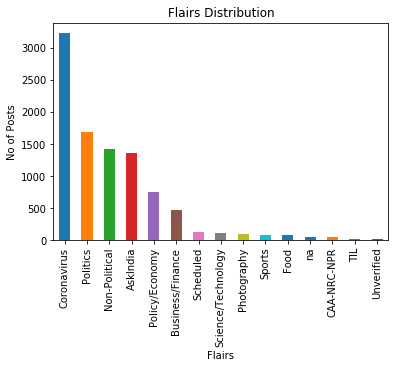

In [29]:
# Let's start with bar chart plotting each flair
# We will use matplotlib for this

data_df['flair'].value_counts().plot(kind='bar')
plt.xlabel('Flairs')
plt.ylabel('No of Posts')
plt.title('Flairs Distribution')

In [30]:
# Above Graph doen't appeal much let's use plotly
# Love Plotly
# We can interact with the graph in the jupyter itself
data_df.groupby('flair').count()['id'].iplot(kind='bar', yTitle='No of Posts', 
                                                    xTitle='Flairs',linecolor='black', title='Flairs Distribution')

In [31]:
# Let's check our flair distribution by percentage value
# I will use Plotly pie chart and we can hover over it to get the value
# We are using plotly.graph_objects which is imported as go
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('flair').count()['id'])])
fig.update_traces(hoverinfo='label+percent+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [32]:
# Let's do some more charts
# Don't worry Plotly got it covered :)
# We will plot distribution of Flairs based on "No of Comments"
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('comms_num').count()['id'])])
fig.update_traces(hoverinfo='label+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(width=0)))
fig.show()

[('na', 6830), ('https', 3373), ('wwwhotstarcom', 1672), ('india', 1448), ('would', 1172), ('movies', 1100), ('people', 1092), ('like', 1083), ('dont', 935), ('indian', 859)]


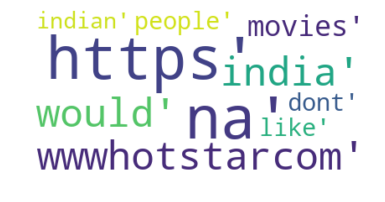

In [33]:
# Let's find out most common words in "body" column
# Most common top 10 words
commonBody = Counter(" ".join(data_df["body"]).split()).most_common(10)
print(commonBody)

# Now let's visualize it
cloud = WordCloud(max_words=10, background_color="white").generate(str(commonBody))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('india', 1736), ('covid19', 1357), ('lockdown', 1025), ('coronavirus', 812), ('indian', 570), ('news', 545), ('says', 396), ('indias', 379), ('times', 367), ('delhi', 335)]


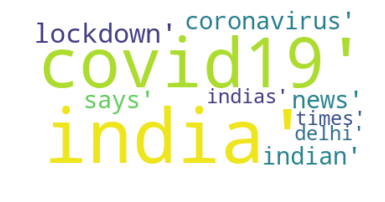

In [34]:
# Let's find out most common words in "title" column
# Most common top 10 words
commTitle = Counter(" ".join(data_df["title"]).split()).most_common(10)
print(commTitle)

# Now let's visualize it
cloud = WordCloud(max_words=10, background_color="white").generate(str(commTitle))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()